<a href="https://colab.research.google.com/github/derinege/Comp423_Project/blob/master/Comp423_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
%cd /content/hugs
!python render.py -m /content/checkpoints/KITTI_02_140_f85_qd3dt --data_type kitti --iteration 30000 --affine

/content/hugs
Looking for config file in /content/checkpoints/KITTI_02_140_f85_qd3dt/cfg_args
Config file found: /content/checkpoints/KITTI_02_140_f85_qd3dt/cfg_args
Rendering /content/checkpoints/KITTI_02_140_f85_qd3dt
Loading trained model at iteration 30000
Found meta_data.json file, assuming Studio data set!
Loaded 92 train cameras and 39 test cameras
Loading Training Cameras
Loading Test Cameras
Rendering progress: 100% 92/92 [01:28<00:00,  1.04it/s]
Rendering progress: 100% 39/39 [00:36<00:00,  1.08it/s]


In [55]:
# Render işlemi bittikten sonra çıktıları kontrol edelim
!ls -la /content/checkpoints/KITTI_02_140_f85_qd3dt/test/ours_30000/

total 32
drwxr-xr-x 8 root root 4096 May 24 19:18 .
drwxr-xr-x 3 root root 4096 May 24 19:18 ..
drwxr-xr-x 2 root root 4096 May 24 19:19 depth
drwxr-xr-x 2 root root 4096 May 24 19:19 error_map
drwxr-xr-x 2 root root 4096 May 24 19:19 gt
drwxr-xr-x 2 root root 4096 May 24 19:19 optical
drwxr-xr-x 2 root root 4096 May 24 19:19 renders
drwxr-xr-x 2 root root 4096 May 24 19:19 semantic


In [56]:
%cd /content/hugs
!python metrics.py -m /content/checkpoints/KITTI_02_140_f85_qd3dt

/content/hugs

Scene: /content/checkpoints/KITTI_02_140_f85_qd3dt
Method: ours_30000
Metric evaluation progress:   0% 0/39 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth

  0% 0.00/233M [00:00<?, ?B/s]
  2% 5.62M/233M [00:00<00:04, 58.9MB/s]
 1

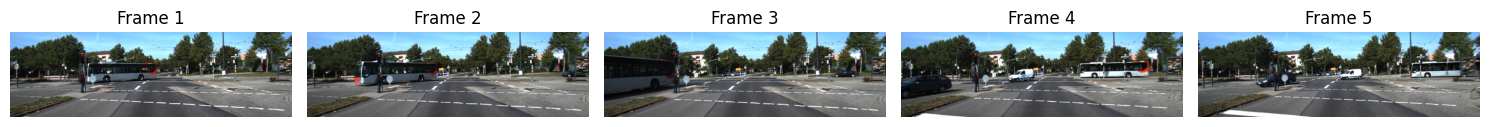

In [57]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Render edilen görüntüleri gösterelim
render_path = "/content/checkpoints/KITTI_02_140_f85_qd3dt/test/ours_30000/renders"
images = glob.glob(f"{render_path}/*.png")[:5]  # İlk 5 görüntü

fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
for i, img_path in enumerate(images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Frame {i+1}")
plt.tight_layout()
plt.show()

In [59]:
%cd /content/hugs
!python render.py -m /content/checkpoints/KITTI360_0000_5200_5266 --data_type kitti360 --iteration 30000 --affine

/content/hugs
Looking for config file in /content/checkpoints/KITTI360_0000_5200_5266/cfg_args
Config file found: /content/checkpoints/KITTI360_0000_5200_5266/cfg_args
Rendering /content/checkpoints/KITTI360_0000_5200_5266
Loading trained model at iteration 30000
Found meta_data.json file, assuming Studio data set!
Loaded 144 train cameras and 124 test cameras
Loading Training Cameras
Loading Test Cameras
Rendering progress: 100% 144/144 [01:35<00:00,  1.51it/s]
Rendering progress: 100% 124/124 [01:22<00:00,  1.51it/s]


In [60]:
!python metrics.py -m /content/checkpoints/KITTI360_0000_5200_5266


Scene: /content/checkpoints/KITTI360_0000_5200_5266
Method: ours_30000
Metric evaluation progress:   0% 0/124 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Metric evaluation progress: 100% 124/124 [01:21<00:00,  1.52it/s]
  SSIM :    0.8135878
  PSNR :   23.7929325
  LPIPS:    0.0928863

Method: ours_30000
Metric evaluation progress: 100% 144/144 [01:32<00:00,  1.56it/s]
  SSIM 

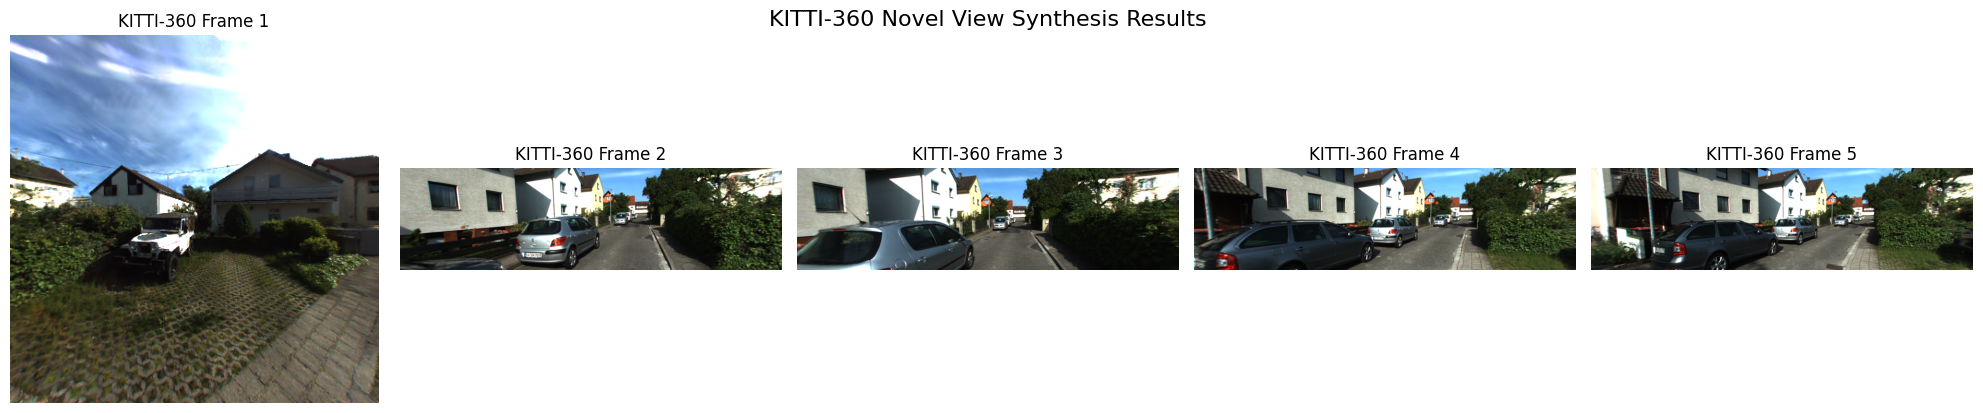

In [61]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

# KITTI-360 render edilen görüntüleri gösterelim
render_path = "/content/checkpoints/KITTI360_0000_5200_5266/test/ours_30000/renders"

if os.path.exists(render_path):
    images = glob.glob(f"{render_path}/*.png")[:5]  # İlk 5 görüntü

    if images:
        fig, axes = plt.subplots(1, len(images), figsize=(20, 4))

        for i, img_path in enumerate(images):
            img = Image.open(img_path)
            if len(images) > 1:
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f"KITTI-360 Frame {i+1}", fontsize=12)
            else:
                axes.imshow(img)
                axes.axis('off')
                axes.set_title(f"KITTI-360 Frame 1", fontsize=12)

        plt.tight_layout()
        plt.suptitle("KITTI-360 Novel View Synthesis Results", fontsize=16, y=1.02)
        plt.show()
    else:
        print("No rendered images found!")
else:
    print(f"Render path not found: {render_path}")
    # Alternatif path'leri kontrol edelim
    print("Available paths:")
    base_path = "/content/checkpoints/KITTI360_0000_5200_5266"
    if os.path.exists(base_path):
        for root, dirs, files in os.walk(base_path):
            print(f"  {root}")

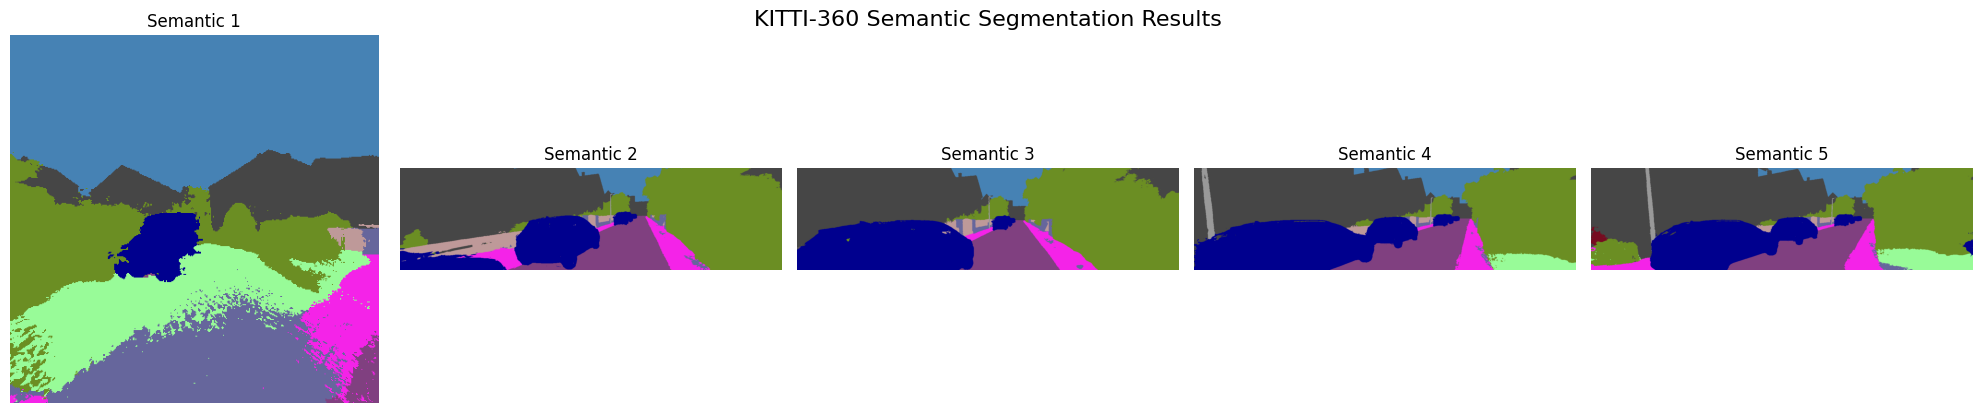

In [62]:
# Semantic segmentation sonuçları
semantic_path = "/content/checkpoints/KITTI360_0000_5200_5266/test/ours_30000/semantic"

if os.path.exists(semantic_path):
    semantic_images = glob.glob(f"{semantic_path}/*.png")[:5]

    if semantic_images:
        fig, axes = plt.subplots(1, len(semantic_images), figsize=(20, 4))

        for i, img_path in enumerate(semantic_images):
            img = Image.open(img_path)
            if len(semantic_images) > 1:
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f"Semantic {i+1}", fontsize=12)
            else:
                axes.imshow(img)
                axes.axis('off')
                axes.set_title(f"Semantic 1", fontsize=12)

        plt.tight_layout()
        plt.suptitle("KITTI-360 Semantic Segmentation Results", fontsize=16, y=1.02)
        plt.show()
    else:
        print("No semantic images found!")

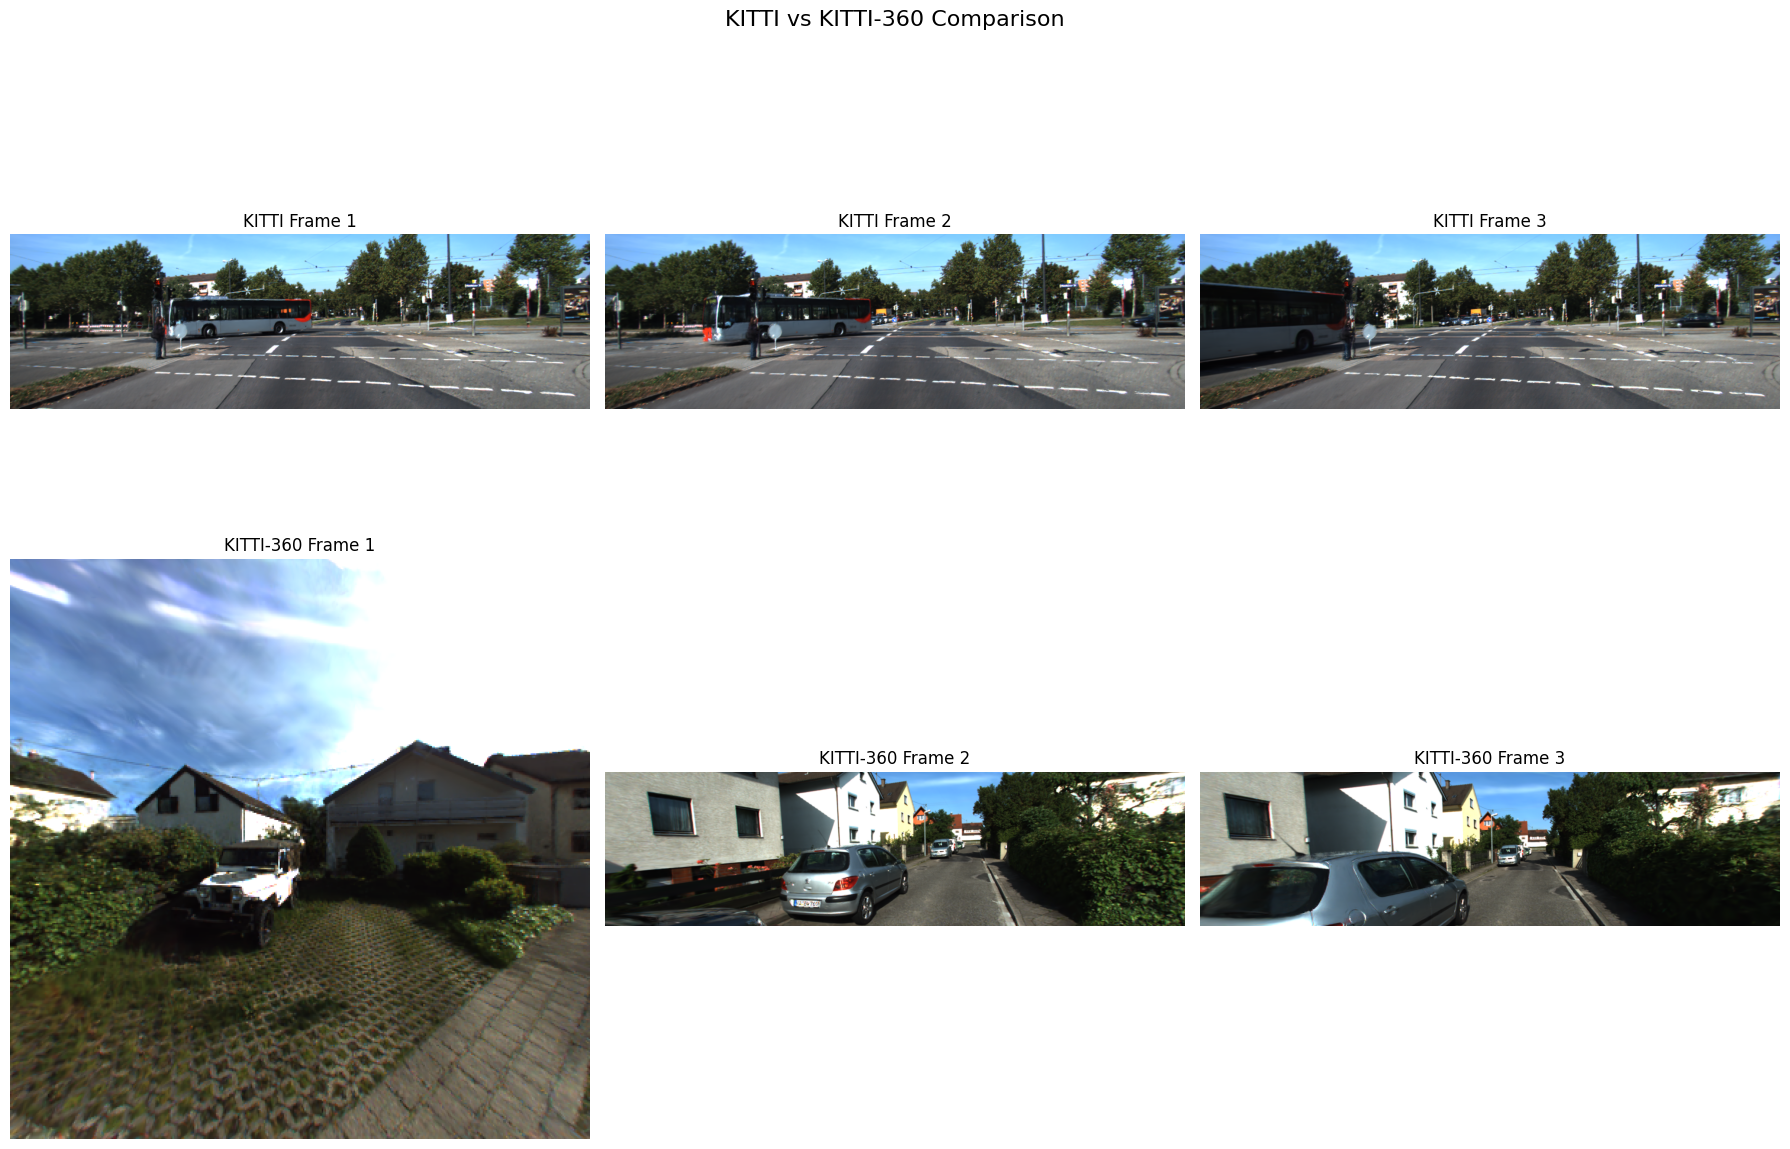

In [63]:
# KITTI ve KITTI-360 karşılaştırması
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# KITTI sonuçları (üst satır)
kitti_path = "/content/checkpoints/KITTI_02_140_f85_qd3dt/test/ours_30000/renders"
kitti_images = glob.glob(f"{kitti_path}/*.png")[:3] if os.path.exists(kitti_path) else []

# KITTI-360 sonuçları (alt satır)
kitti360_path = "/content/checkpoints/KITTI360_0000_5200_5266/test/ours_30000/renders"
kitti360_images = glob.glob(f"{kitti360_path}/*.png")[:3] if os.path.exists(kitti360_path) else []

# KITTI görüntüleri
for i in range(3):
    if i < len(kitti_images):
        img = Image.open(kitti_images[i])
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"KITTI Frame {i+1}", fontsize=12)
    axes[0, i].axis('off')

# KITTI-360 görüntüleri
for i in range(3):
    if i < len(kitti360_images):
        img = Image.open(kitti360_images[i])
        axes[1, i].imshow(img)
        axes[1, i].set_title(f"KITTI-360 Frame {i+1}", fontsize=12)
    axes[1, i].axis('off')

plt.tight_layout()
plt.suptitle("KITTI vs KITTI-360 Comparison", fontsize=16, y=0.98)
plt.show()

In [64]:
# Metrics karşılaştırması (eğer KITTI-360 metrics çalıştırıldıysa)
print("=== DATASET COMPARISON ===")
print("\nKITTI Dataset Results:")
print("SSIM: 0.8243, PSNR: 24.91 dB, LPIPS: 0.0844")

print("\nKITTI-360 Dataset Results:")
print("(Results will be shown after running metrics.py)")

=== DATASET COMPARISON ===

KITTI Dataset Results:
SSIM: 0.8243, PSNR: 24.91 dB, LPIPS: 0.0844

KITTI-360 Dataset Results:
(Results will be shown after running metrics.py)
